<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Natural Language Processing**

- Setup Spacy and Language Library
-Understant Basic NLP Topic

  - Tokenization
  - Stemming
  - Lemmatization
  - Stop Words
- Spacy for Vocabulary Matching

What is Spacy?

- Open Source NLP Library.
- Designed to effectively handle NLP tasks with the most efficient implementation of comman algorithms.
- **spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).
- For many NLP tasks,Spacy only has one implement method, choosing the most efficient algorithm currently avaible.

What is NLTK?

- NLTK - Natural Language Toolkit is a very popular open source.

- Initially released in 2001 , it is much older than Spacy(released 2015)

- It also provides many functionalities , but includes less efficient implementations.

NLTK vs Spacy

- For many comman NLP tasks, Spacy is much faster and more efficient , at the cost of the user not being able to choose algorithmic implementations.

- Spacy dones not iclude pre-created models for some application , such as sentiment analysis, which is typically easier to perform with NLTK.



What is NLP?
- natural Language Processing(NLP) is an area of computer science and artificail intellgence concerned with the interactions between computers and human(natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

- Natural Language Processing (NLP) is a subfield of Artificial Intelligence (AI) that focuses on the interaction between computers and human languages.

Goal of NLP:

The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is meaningful and useful. It bridges the gap between human communication (natural language) and machine understanding.

Key Components of NLP

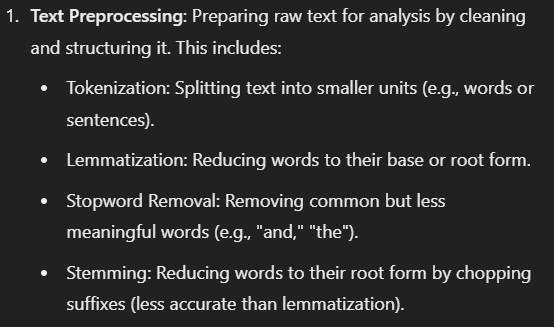

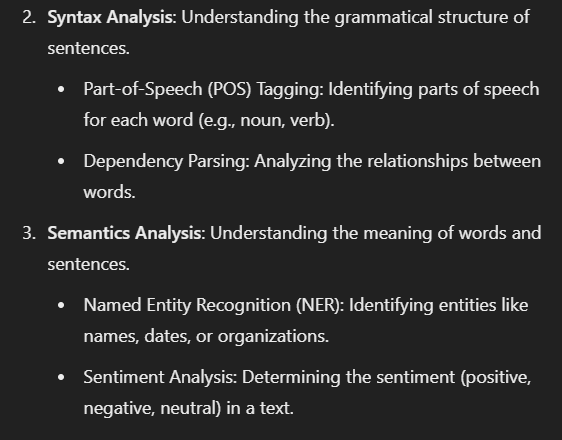

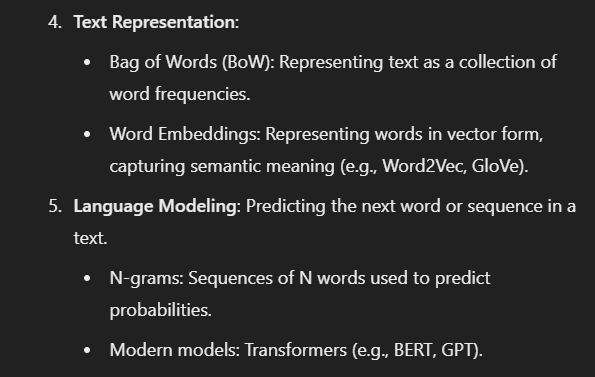

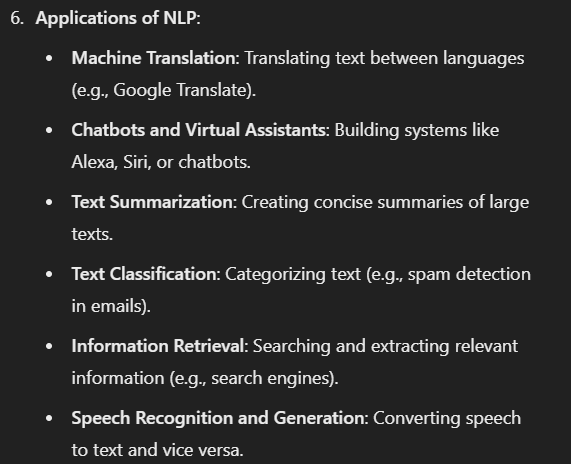

# **Spacy Setup and Overview**

Example Use Case:

- Classifying Emails as Spam vs Legitimate.
- Sentiment Analysis of Text Movie Reviews.
- Analyzing Trends from Written Customer Feedback forms.

- Understanding text commands,"Hey Google, Play this song".

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


There are few Key steps for working with Spacy:

- Loading the Lanquage Library
- Building a pipeline Object
- Using Tokens
- Parts-of-Speech Tagging
- Understanding Token Attributes.

The npl() function from spacy automatically takes raw text and performs a series of operation to tag,parse, and describe the text data.

In [ ]:
import spacy
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

**Tokenization** - Segmenting text into words, punctuations marks etc.

**Part-of-speech (POS)** -  Tagging	Assigning word types to tokens, like verb or noun.

**Dependency Parsing** -	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

In [ ]:
for token in doc:
  print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


In [ ]:
for token in doc:
  print(token.text, token.pos)

Tesla 96
is 87
looking 100
at 85
buying 100
U.S. 96
startup 92
for 85
$ 99
6 93
million 93


In [ ]:
for token in doc:
  print(token.text, token.pos_)

Tesla PROPN
is AUX
looking VERB
at ADP
buying VERB
U.S. PROPN
startup NOUN
for ADP
$ SYM
6 NUM
million NUM


In [ ]:
for token in doc:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.



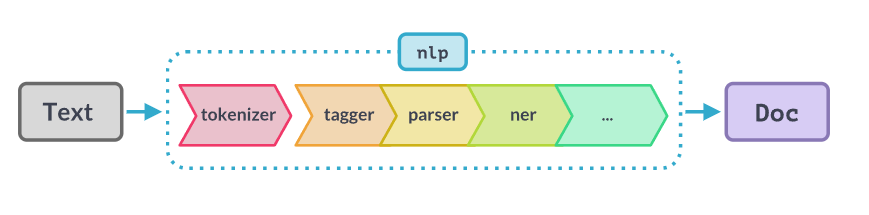

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7eecadc663f0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7eecadc65cd0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7eed6abc3df0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7eecadc75d90>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7eecada2e8d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7eed707f8580>)]

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

**Tokenization**
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information.

In [ ]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [ ]:
for token in doc2:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [ ]:
doc3 = nlp(u"Tesla isn't    looking into startups anymore.")

In [ ]:
for token in doc3:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
    SPACE dep
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [ ]:
# we can also use indexing to actually grab tokens individually

doc3[0]

Tesla

In [ ]:
type(doc3[0])

spacy.tokens.token.Token

**Part-of-Speech Tagging (POS)**
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.


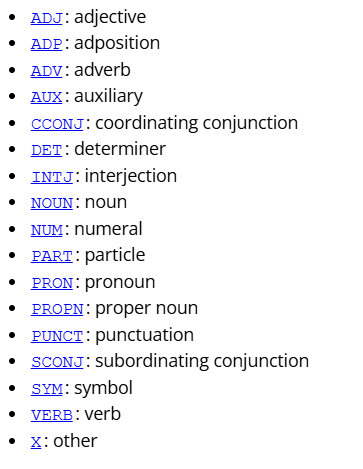

In [ ]:
doc3[0].pos_

'PROPN'

In [ ]:
type(doc3[0].pos_)

str

**dependency**

In Natural Language Processing (NLP), dependency refers to the grammatical structure of a sentence, where words are connected based on their syntactic relationships. This structure is represented in the form of a dependency tree, where each word in a sentence is a node, and the edges represent the grammatical dependencies between words.

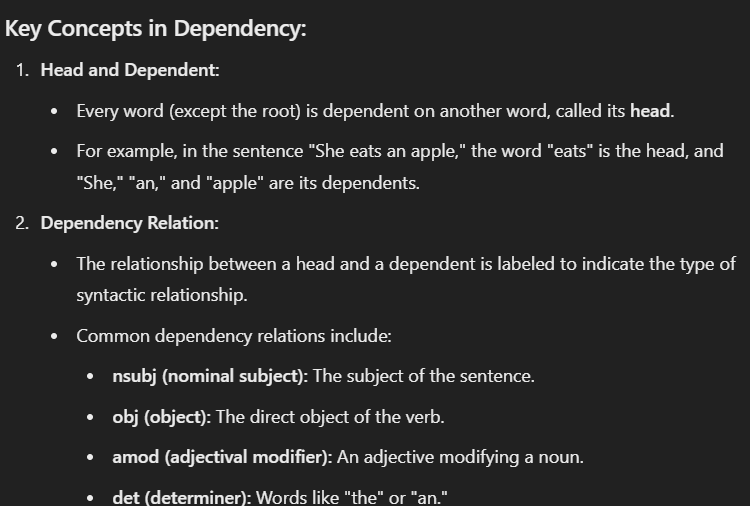

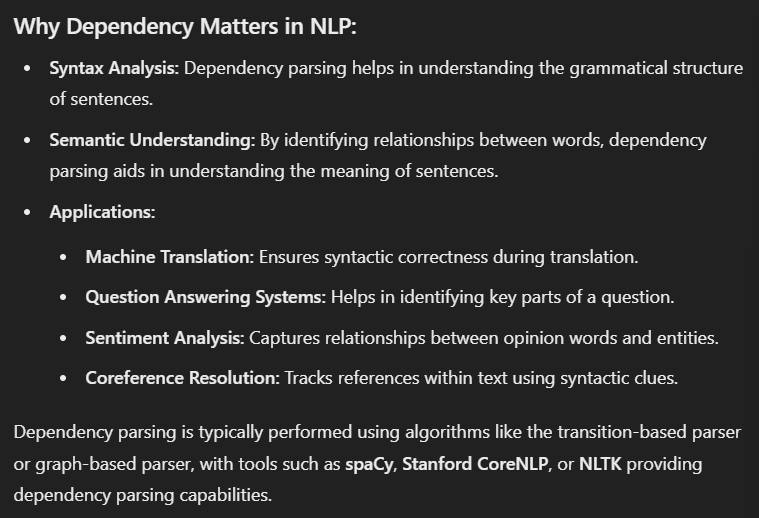

In [ ]:
doc3[0].dep_

'nsubj'

In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
spacy.explain('nsubj')

'nominal subject'

In [ ]:
#To see the full name of a tag use `spacy.explain(tag)`

**Additional Token Attributes**

We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [ ]:
# Lemmas (the base form of the word):
print(doc3[4].text)
print(doc3[4].lemma_)

looking
look


In [ ]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

ADP
IN / conjunction, subordinating or preposition


In [ ]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [ ]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


**Spans**
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [ ]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc3[16:30]

In [ ]:
print(life_quote)

"Life is what happens to us while we are making other plans"


In [ ]:
type(life_quote)

spacy.tokens.span.Span

In [ ]:
type(doc3)

spacy.tokens.doc.Doc

**Sentence**

In [ ]:
doc4 = nlp("This is the first sentence.This is another sentence.This is third sentence.")

In [ ]:
for sent in doc4.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is third sentence.


In [ ]:
doc4[6].is_sent_start

True

In [ ]:
doc4[5].is_sent_end

True

# Tokenization

- Tokenization is the process of breaking up the original text into component pieces(Tokens).

- Tokens are pieces of the original text.

- Tokens are the basic building blocks of a Doc object - everything that helps us understand the menaing of the text is derived from tokens and their relationship to one another.

- prefix: Characters at the beginning
- suffix: characters at the end
- infix: characters in between prefix and suffix.
- exception: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.






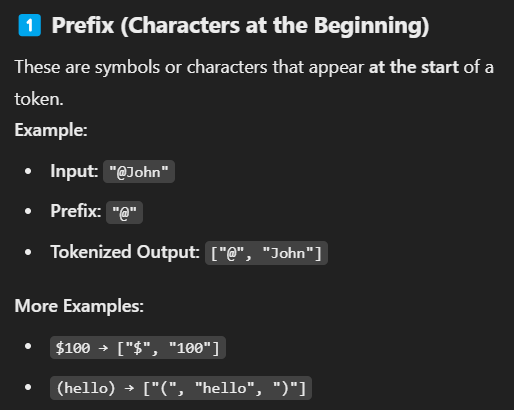


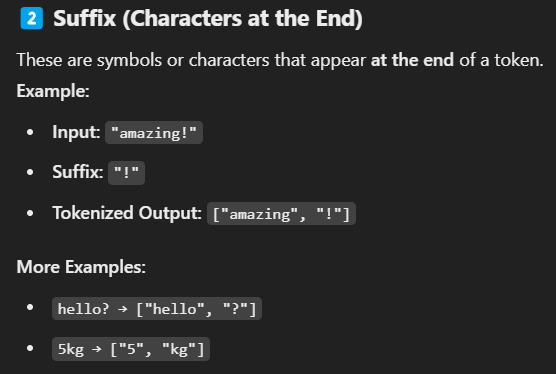

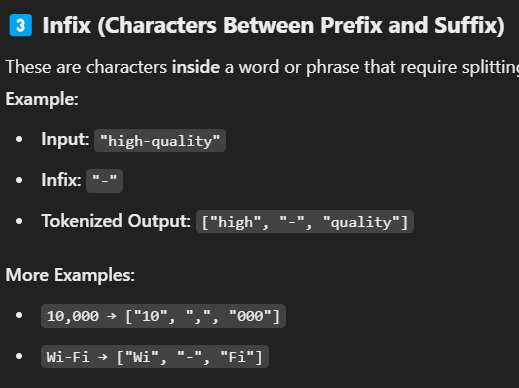

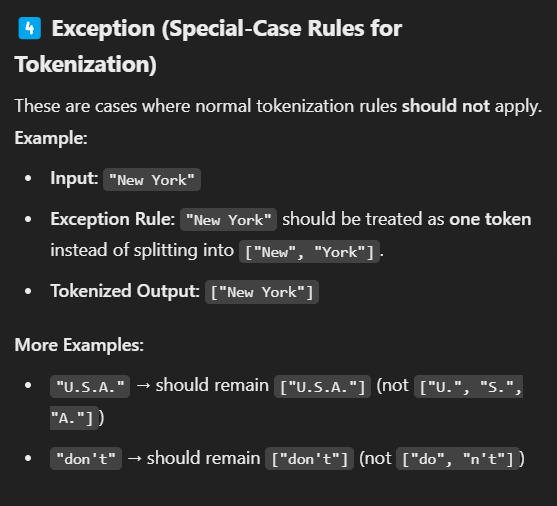

In [ ]:
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [ ]:
# Create a Doc object and explore tokens
doc10 = nlp(mystring)

for token in doc10:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

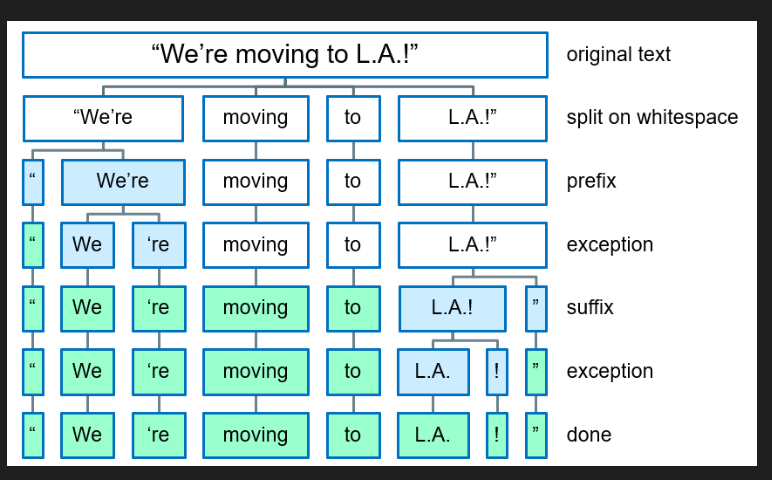

In [ ]:
doc2 = nlp("We're here to help! send snail-mail, email support@oursite.com or visit us at http://www.oursite.com! ")

In [ ]:
for t in doc2:
  print(t.text)

We
're
here
to
help
!
send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [ ]:
# '''Note that the exclamation points, comma, and the hyphen in 'snail-mail'
# are assigned their own tokens, yet both the email address and website are preserved.'''

In [ ]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [ ]:
# Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.

Exceptions:

Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [ ]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


**Counting Tokens**

`Doc` objects have a set number of tokens:

In [ ]:
len(doc10)

8

**Counting Vocab Entries**:

`Vocab` objects contain a full library of items!

- In NLP tokenization, "Counting Vocabulary Entries" refers to the process of determining the number of unique words (tokens) in a given text after tokenization.

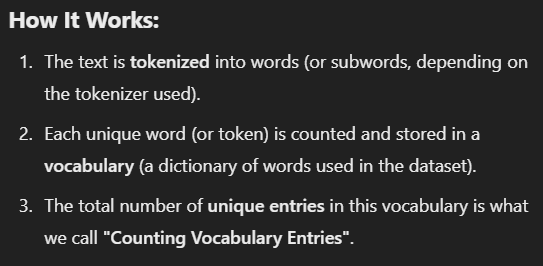

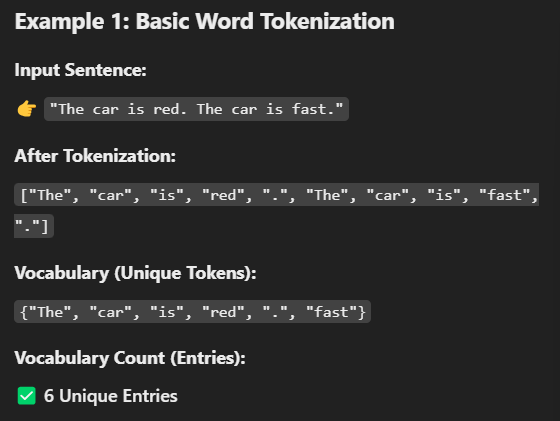

In [ ]:
len(doc10.vocab)

825

In [ ]:
text = "The car is red. The car is fast."

In [ ]:
doc11 = nlp(text)

In [ ]:
token = [t.text for t in doc11]

In [ ]:
vocab = set(token)

In [ ]:
print("Unique Vocabulary:", vocab)
print("Total Unique Entries:", len(vocab))

Unique Vocabulary: {'.', 'is', 'red', 'car', 'fast', 'The'}
Total Unique Entries: 6


Tokens can be retrieved by index position and slice:

`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:

In [ ]:
doc11[0]

The

In [ ]:
doc11[2:6]

is red. The

In [ ]:
doc11[-4:]

car is fast.

In [ ]:
doc11[0] = 'test'

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

📌 Named Entities in NLP

- Named Entities are specific real-world objects (like names of people, organizations, locations, dates, etc.) that are identified in a given text.
- Named Entity Recognition (NER) is the NLP technique used to detect and classify these entities.

- Named entities are accessible through the `ents` property of a `Doc` object.

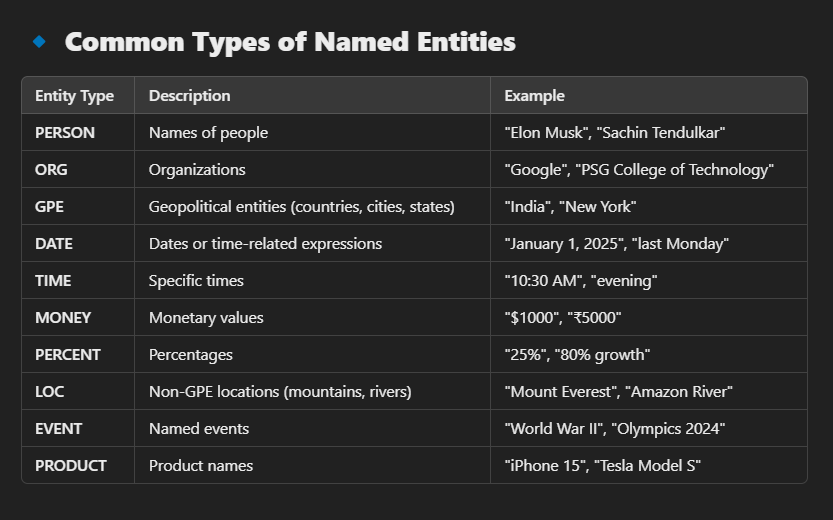

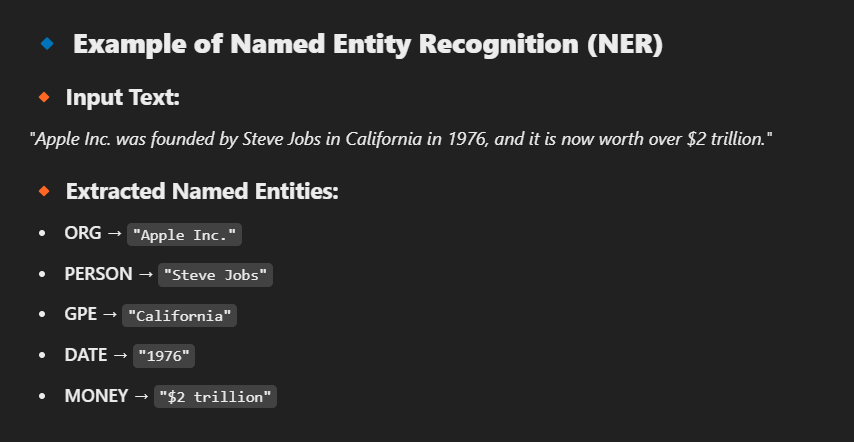

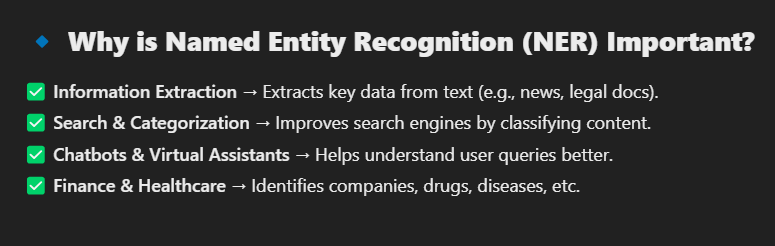

In [ ]:
text = "Apple Inc. was founded by Steve Jobs in California in 1976, and it is now worth over $2 trillion."

# Process text
doc = nlp(text)

# Print Named Entities
for ent in doc.ents:
    print(f"Entity: {ent.text}, Type: {ent.label_}")

Entity: Apple Inc., Type: ORG
Entity: Steve Jobs, Type: PERSON
Entity: California, Type: GPE
Entity: 1976, Type: DATE
Entity: over $2 trillion, Type: MONEY


In [ ]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [ ]:
len(doc8.ents)

3

📌 Noun Chunks in NLP:

- Noun Chunks are phrases centered around a noun that provide meaningful information about the noun.

- These chunks typically include determiners, adjectives, and prepositional phrases along with the noun.

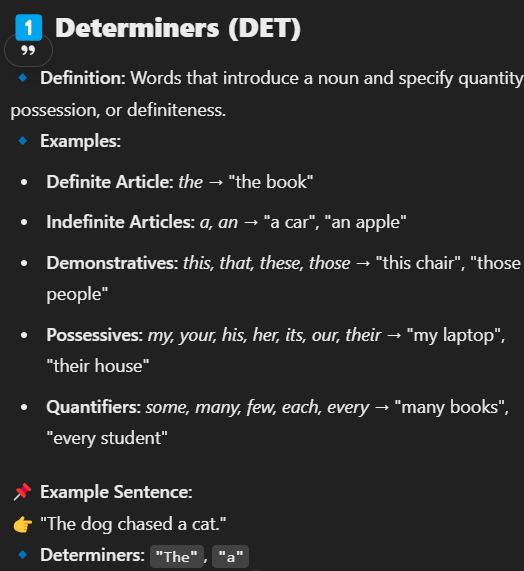

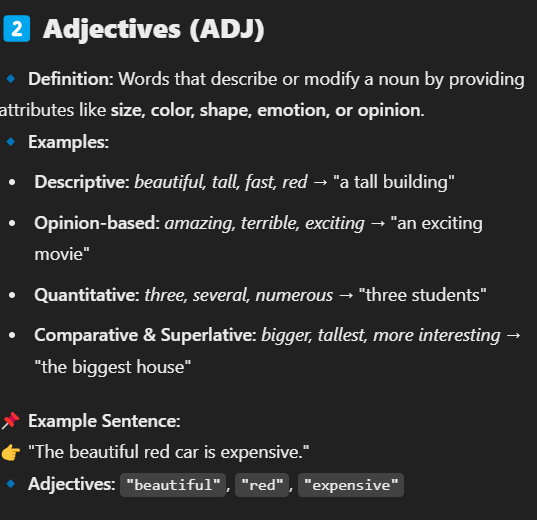

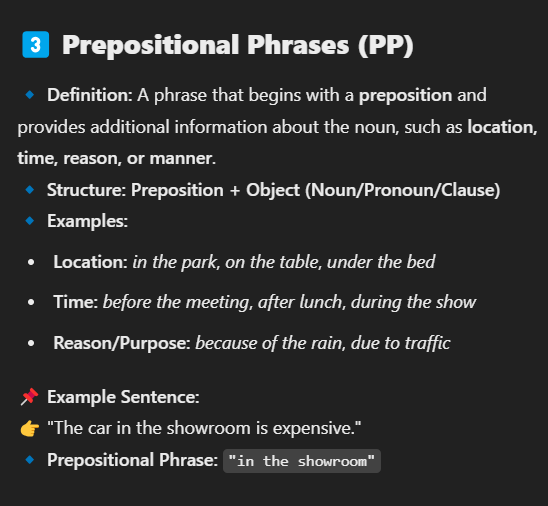

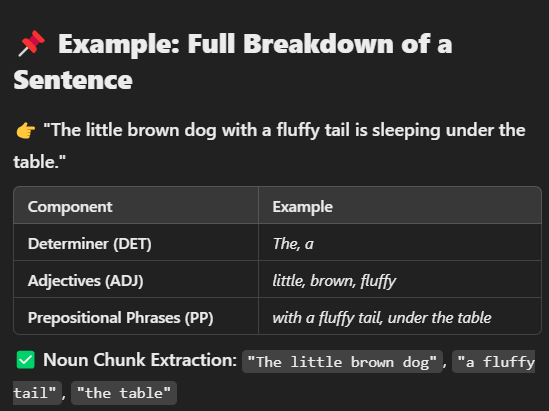

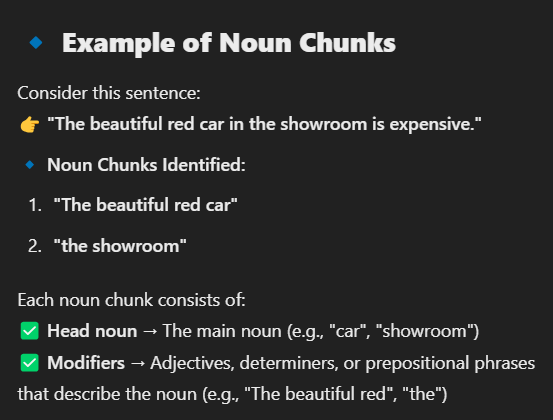

In [ ]:
text = "The beautiful red car in the showroom is expensive."

# Process the text
doc = nlp(text)

# Extract and print noun chunks
print("Noun Chunks:")
for chunk in doc.noun_chunks:
    print(f"- {chunk.text}")

Noun Chunks:
- The beautiful red car
- the showroom


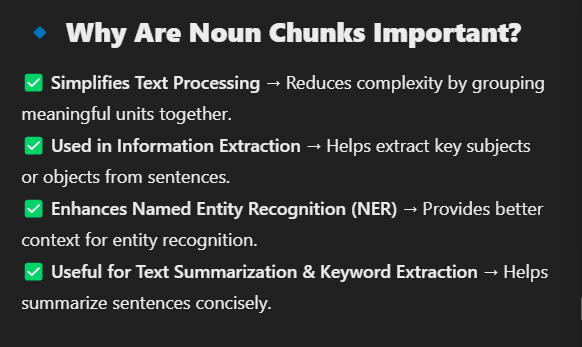

In [ ]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [ ]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [ ]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater



📌 Token Visualization in NLP:

- Token visualization is a way to graphically represent tokens, their relationships, dependencies, parts of speech (POS), named entities, and syntactic structures in a text.

- This helps in understanding how NLP models analyze sentences.

- spaCy provides a visualization tool called displacy that helps visualize:

       - Dependency Parsing (word relationships)
      - Named Entity Recognition (NER)



In [ ]:
from spacy import displacy

In [ ]:
doc14 = nlp(u'Apple is going to build a U.K. factory for $6 million.')

In [ ]:
displacy.render(doc14,style ='dep',jupyter=True,options = {'distance':110})

In [ ]:
doc16 = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc16, style='ent', jupyter=True)

In [ ]:
doc17 = nlp(u'This is a sentence.')
displacy.serve(doc17, style='dep')

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


#Stemming

- often when searching text for a certain keywords, it help if the search returns variations of the word.

- For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].


- Stemming is a text normalization technique in NLP where words are reduced to their root or base form by removing suffixes.

- The resulting stem may not always be a real word, but it helps in reducing dimensionality and improving text processing efficiency.

- Stemming is like cutting words short to find their basic form. It helps computers understand that different versions of a word mean the same thing.

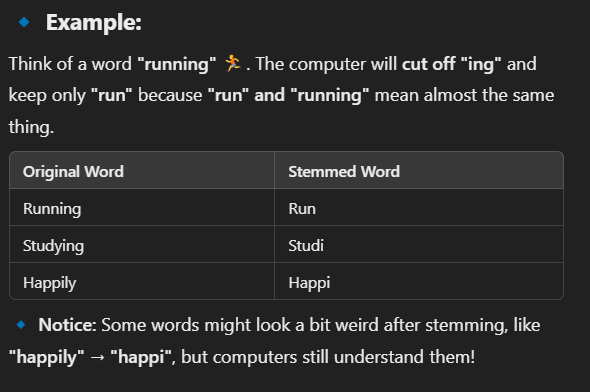



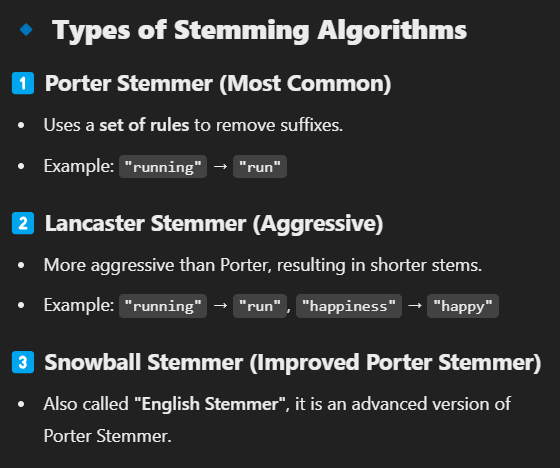

📌 Types of Stemming Algorithms (With Simple Explanation & Examples)

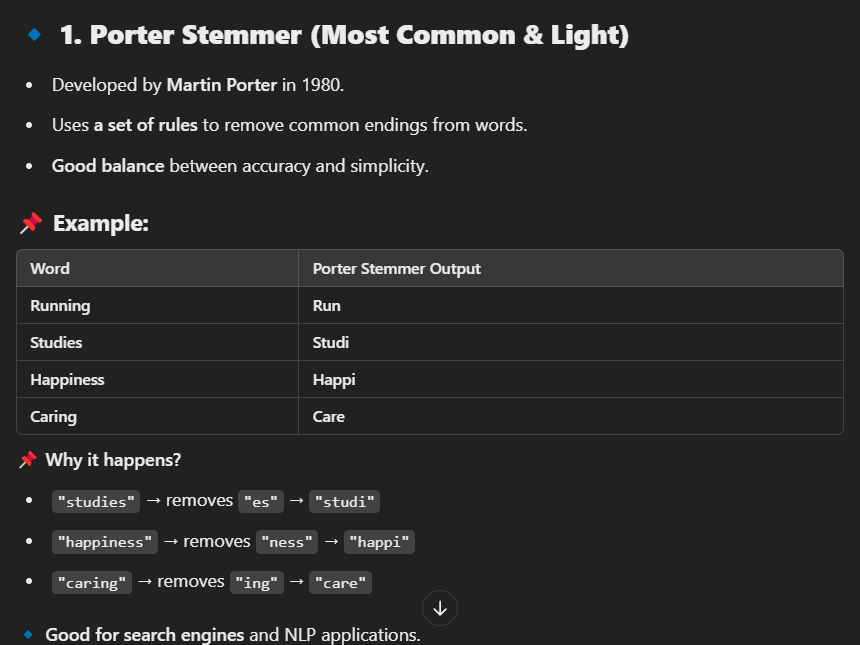

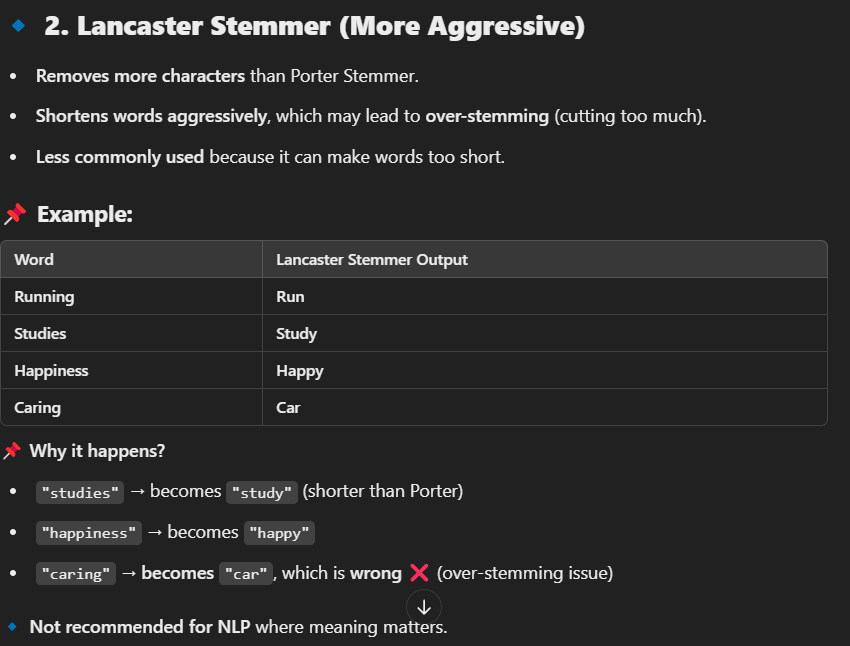

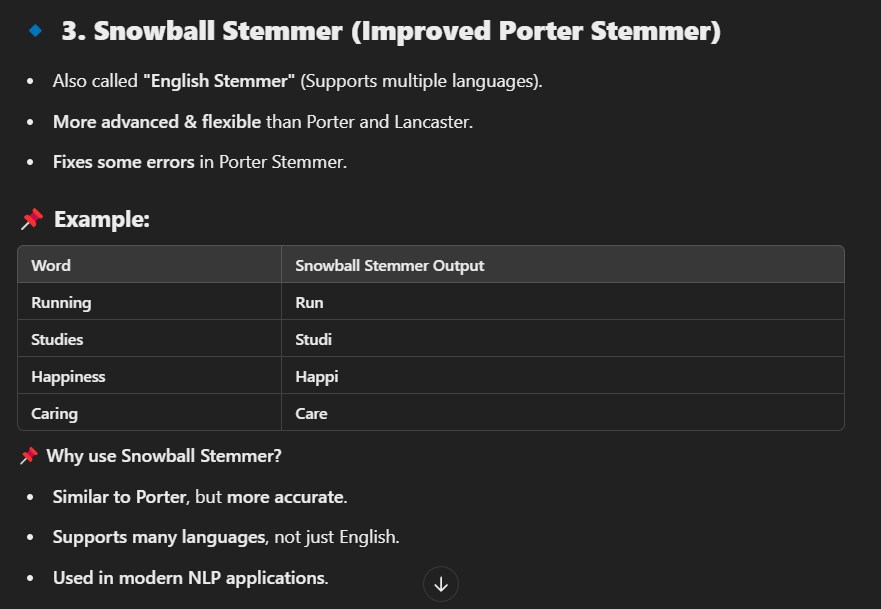

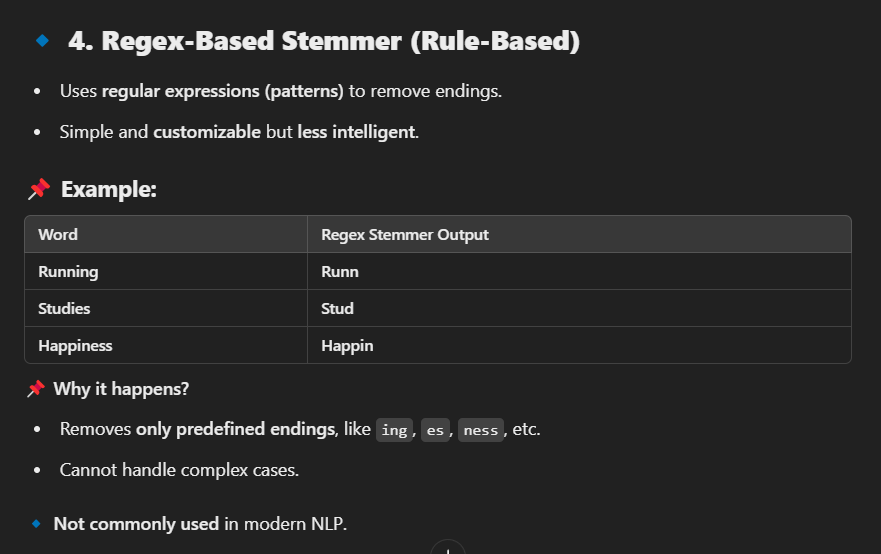

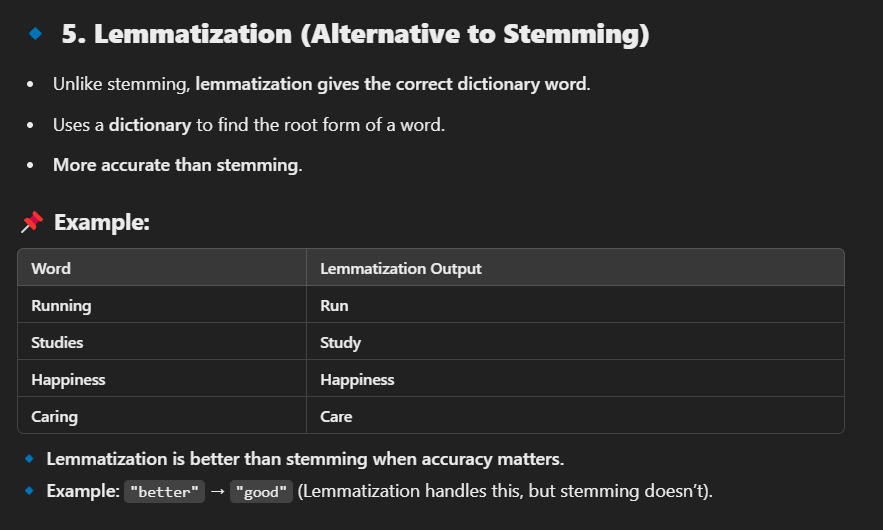

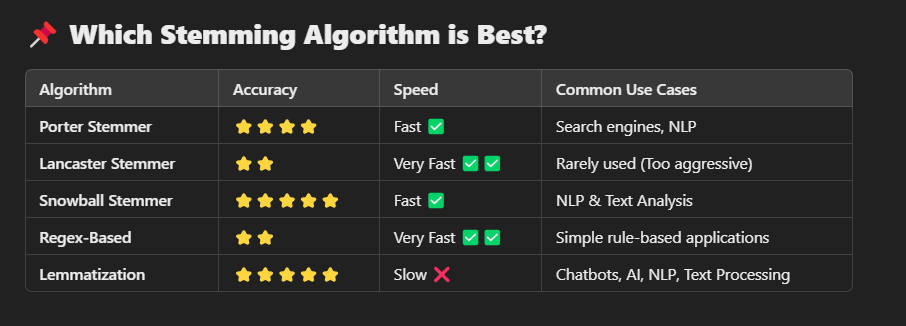

In [ ]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
porter = PorterStemmer()

# Sample words
words = ["running", "flies", "happiness", "studies", "easily", "caring"]

for word in words:
  print(word+'----->'+porter.stem(word))




running----->run
flies----->fli
happiness----->happi
studies----->studi
easily----->easili
caring----->care


In [ ]:
from nltk.stem import SnowballStemmer

# Initialize Snowball Stemmer for English
snowball = SnowballStemmer("english")

for word in words:
  print(word+'----->'+snowball.stem(word))

running----->run
flies----->fli
happiness----->happi
studies----->studi
easily----->easili
caring----->care


In [ ]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+porter.stem(word))

I --> i
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


In [ ]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+snowball.stem(word))

I --> i
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


#**What is Lemmatization in NLP?**

- Lemmatization is a smart way to find the actual dictionary word (root word) of a given word. Unlike stemming, which just cuts off endings, lemmatization looks at the meaning of the word and finds the correct base form.

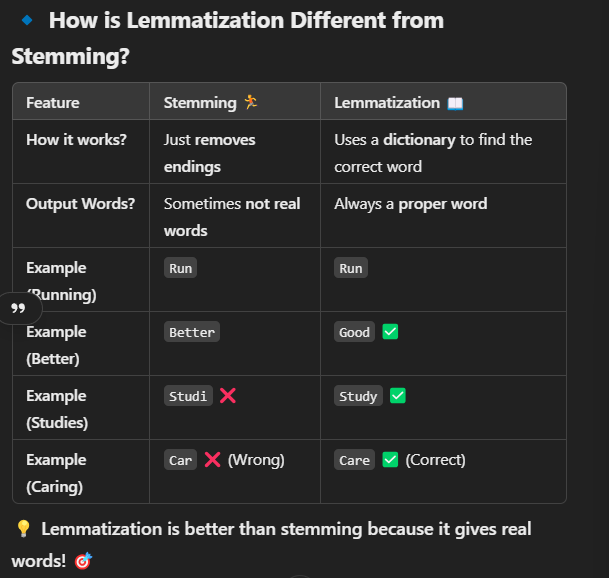

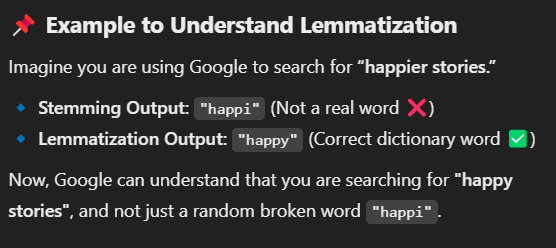

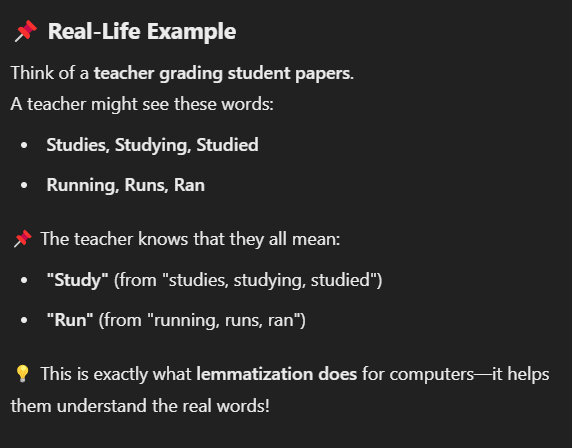

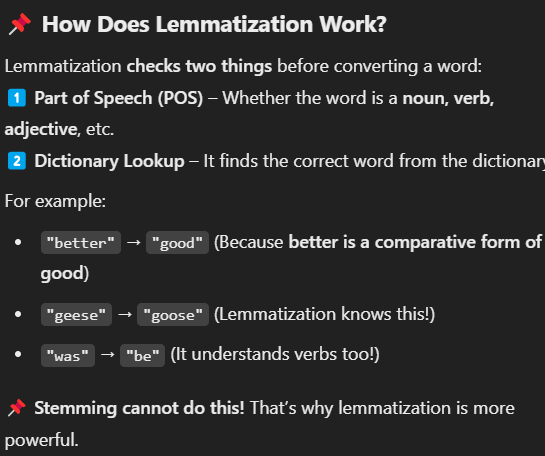




In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
doc18 = nlp(u"I am a runner running in a race because I love to run since I ran today")

In [3]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}}  {token.lemma_}')

In [4]:
show_lemmas(doc18)

I            PRON    I
am           AUX     be
a            DET     a
runner       NOUN    runner
running      VERB    run
in           ADP     in
a            DET     a
race         NOUN    race
because      SCONJ   because
I            PRON    I
love         VERB    love
to           PART    to
run          VERB    run
since        SCONJ   since
I            PRON    I
ran          VERB    run
today        NOUN    today


In [5]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON    I
saw          VERB    see
eighteen     NUM     eighteen
mice         NOUN    mouse
today        NOUN    today
!            PUNCT   !


In [6]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON    I
am           AUX     be
meeting      VERB    meet
him          PRON    he
tomorrow     NOUN    tomorrow
at           ADP     at
the          DET     the
meeting      NOUN    meeting
.            PUNCT   .


In [7]:
doc4 = nlp(u"That's an enormous automobile")

show_lemmas(doc4)

That         PRON    that
's           AUX     be
an           DET     an
enormous     ADJ     enormous
automobile   NOUN    automobile


# **Stop Words**

- Stop words are common words like "is," "a," "the," "and," "in," "of," "to" that appear very frequently in sentences but don’t add much meaning when analyzing text.

💡 Think of it like this:

- When you search for something on Google, you don’t care about words like “the” or “is” in your search results. Instead, you want to find the important words that actually help you understand the topic.

- This is exactly what stop words do in NLP—they are removed so that computers can focus on the main words that matter.

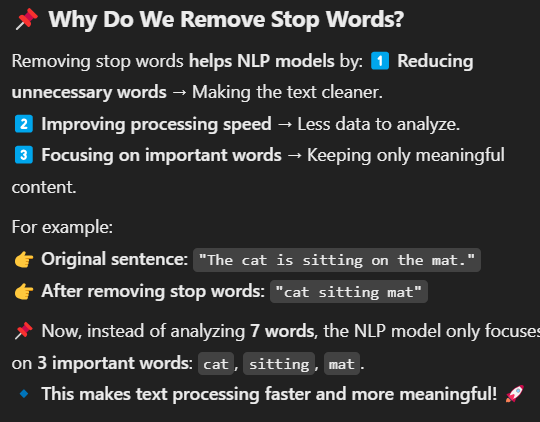

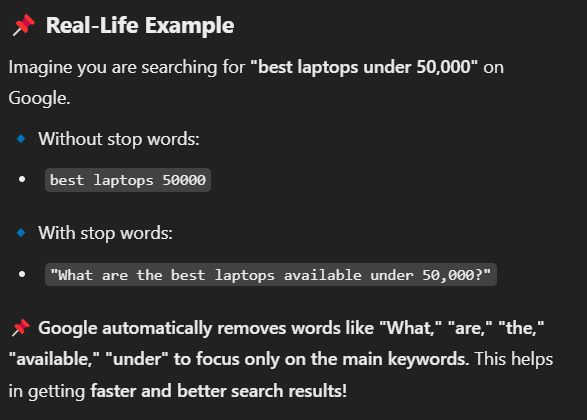

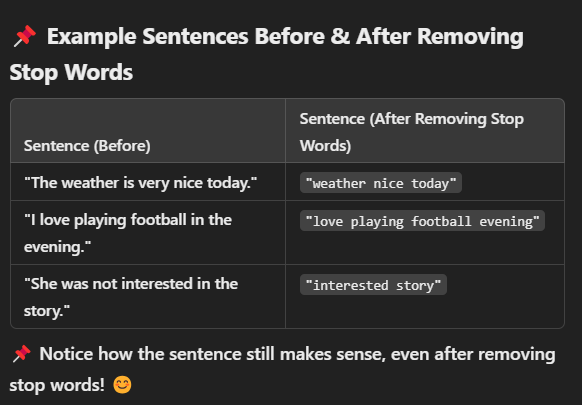


In [8]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'toward', 'six', 'something', 'other', 'get', 'am', 'and', 'into', 'yourselves', 'being', 'nobody', 'under', 'yet', 'never', 'whence', 'would', 'through', 'anyone', 'you', 'made', 'also', 'a', 'do', 'everywhere', 'during', 'must', 'at', 'without', 'used', 'whenever', 'whereafter', 'about', 'say', 'became', 'ours', 'was', 'none', 'from', 'rather', 'thus', 'himself', 'except', 'down', 'for', 'own', 'which', 'each', 'though', 'been', 'forty', 'itself', "n't", 'whoever', 'whose', 'among', 'fifty', 'just', '‘d', 'your', 'ca', 'within', 'both', 'done', 'an', 'when', 'in', 'third', 'five', '‘re', '‘ve', '‘s', 'its', 'three', 'no', 'everyone', 'yours', 'else', 'thereupon', 'mine', 'themselves', 'many', 'around', 'anyhow', 'more', 'to', 'one', 'several', 'latterly', 'otherwise', 'whether', 'noone', 'less', 'herself', 'upon', 'formerly', 'four', 'further', 'this', 'i', 'with', 'two', '‘ll', 'twenty', 'again', 'does', 'meanwhile', 'might', 'various', 'myself', 'whatever', 'after', 'however', 'al

In [9]:
len(nlp.Defaults.stop_words)

326

**To see if a word is a stop word**


In [10]:
nlp.vocab['myself'].is_stop

True

In [11]:
nlp.vocab['mystery'].is_stop

False

 **To add a stop word**

There may be times when you wish to add a stop word to the default set. Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.

In [12]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [13]:
len(nlp.Defaults.stop_words)

327

In [14]:
nlp.vocab['btw'].is_stop

True

**To remove a stop word**

Alternatively, you may decide that `'beyond'` should not be considered a stop word.

In [15]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False

In [16]:
len(nlp.Defaults.stop_words)

326

In [17]:
nlp.vocab['beyond'].is_stop

False

In [18]:
# Example 1: Check if a Word is a Stop Word

import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Check if a word is a stop word
word = "the"
print(f"Is '{word}' a stop word? {nlp.vocab[word].is_stop}")

word2 = "computer"
print(f"Is '{word2}' a stop word? {nlp.vocab[word2].is_stop}")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Is 'the' a stop word? True
Is 'computer' a stop word? False


In [19]:
#  Example 2: Remove Stop Words from a Sentence

import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Example text
text = "This is an example sentence to demonstrate stop word removal."

# Process text with spaCy
doc = nlp(text)

# Remove stop words
filtered_words = [token.text for token in doc if not token.is_stop]

# Print results
print("Original Sentence:", text)
print("After Removing Stop Words:", " ".join(filtered_words))



Original Sentence: This is an example sentence to demonstrate stop word removal.
After Removing Stop Words: example sentence demonstrate stop word removal .


# **Vocabulary and Matching**

- So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas.

- In this section we will identify and label specific phrases that match patterns we can define ourselves.

 **What is Rule-Based Matching**
 - Rule-based matching is a technique in Natural Language Processing (NLP) where we define patterns (rules) to find specific words, phrases, or structures in text.

- spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

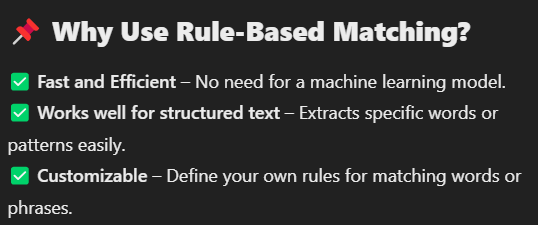




In [20]:
import spacy
from spacy.matcher import Matcher

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Create a Matcher object
matcher = Matcher(nlp.vocab)

In [21]:
# Define a pattern to match the word "price"
pattern = [{"LOWER": "price"}]

In [22]:
matcher.add("PRICE_PATTERN", [pattern])

In [23]:
text = "The car's price is too high, but I am looking for a better price."

# Process the text
doc = nlp(text)

# Apply the matcher
matches = matcher(doc)

# Print matches
for match_id, start, end in matches:
    print("Matched word:", doc[start:end].text)

Matched word: price
Matched word: price


In [24]:
# 💡 Explanation:

# The pattern { "LOWER": "price" } looks for the word "price" (case-insensitive).
# The matcher finds both occurrences of "price" in the text.

In [25]:
# Example 2: Matching Adjectives + Nouns (e.g., "beautiful car")

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Define a pattern: Adjective followed by a Noun (e.g., "beautiful car")
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}]

matcher.add("ADJ_NOUN_PATTERN", [pattern])

text = "I saw a beautiful car and a fast bike on the road."

doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print("Matched phrase:", doc[start:end].text)


Matched phrase: beautiful car
Matched phrase: fast bike


In [26]:
# Example 3: Match Phone Numbers (Regex Style)
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Define a pattern for phone numbers (e.g., 123-456-7890)
pattern = [{"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "dddd"}]

matcher.add("PHONE_PATTERN", [pattern])

text = "You can reach me at 987-654-3210 or 123-456-7890."

doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print("Matched phone number:", doc[start:end].text)



Matched phone number: 987-654-3210
Matched phone number: 123-456-7890


**Creating patterns**

In literature, the phrase 'solar power' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [30]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher1 = Matcher(nlp.vocab)
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

matcher1.add('SolarPower',[pattern1, pattern2, pattern3])

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [31]:
# Let's break this down:
# * `pattern1` looks for a single token whose lowercase text reads 'solarpower'
# * `pattern2` looks for two adjacent tokens that read 'solar' and 'power' in that order
# * `pattern3` looks for three adjacent tokens, with a middle token that can be any punctuation.

In [32]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [33]:
found_matches = matcher(doc)
print(found_matches)

[]


<ipython-input-33-977e0611bcdd>:1: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  found_matches = matcher(doc)


In [34]:
# `matcher` returns a list of tuples. Each tuple contains an ID for the match, with start & end tokens that map to the span `doc[start:end]`

In [35]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

**Setting Pattern Options and Quantifiers in Rule-Based Matching (spaCy)**

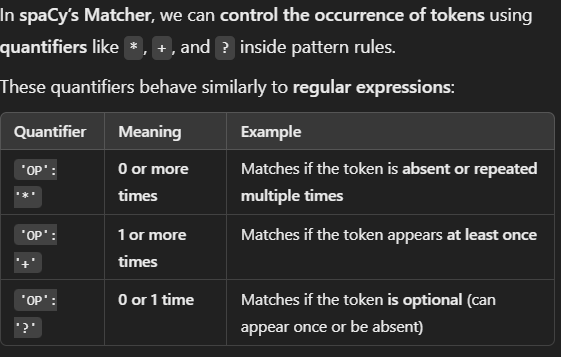


In [36]:
# 📌 Example 1: Optional Token ('OP': '*')
# 💡 Match "buy car", "buy a car", or "buy the car"

In [37]:
import spacy
from spacy.matcher import Matcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Define pattern: "buy" + optional ("a" or "the") + "car"
pattern = [
    {"LOWER": "buy"},
    {"LOWER": {"IN": ["a", "the"]}, "OP": "*"},  # Optional "a" or "the"
    {"LOWER": "car"}
]

matcher.add("BUY_CAR_PATTERN", [pattern])

# Test sentences
texts = [
    "I want to buy a car.",
    "He decided to buy the car.",
    "She plans to buy car."
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")


Matched: buy a car
Matched: buy the car
Matched: buy car


In [38]:
# ✅ The 'OP': '*' allows "a" or "the" to be optional while still matching "buy car".

In [39]:
# 📌 Example 2: One or More Occurrences ('OP': '+')
# 💡 Match repeated adjectives before a noun (e.g., "fast car", "very fast car")

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Pattern: One or more adjectives followed by a noun
pattern = [
    {"POS": "ADJ", "OP": "+"},  # One or more adjectives
    {"POS": "NOUN"}             # Followed by a noun
]

matcher.add("ADJ_NOUN_PATTERN", [pattern])

# Test sentences
texts = [
    "I saw a fast car.",
    "He drives a very fast car.",
    "She owns a beautiful red sports car."
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")


Matched: fast car
Matched: fast car
Matched: red sports
Matched: beautiful red sports


In [40]:
# ✅ The 'OP': '+' ensures that at least one adjective appears before the noun.

In [41]:
# 📌 Example 3: Optional Token ('OP': '?')
# 💡 Match "car", "red car", "fast red car" (with an optional adjective before "car")

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Pattern: Optional adjective followed by a noun
pattern = [
    {"POS": "ADJ", "OP": "?"},  # Optional adjective
    {"POS": "NOUN"}             # Followed by a noun
]

matcher.add("OPTIONAL_ADJ_PATTERN", [pattern])

# Test sentences
texts = [
    "I have a car.",
    "He bought a red car.",
    "She drives a fast red car."
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")



Matched: car
Matched: red car
Matched: car
Matched: red car
Matched: car


In [42]:
# ✅ The 'OP': '?' makes the adjective optional—so the matcher works even if no adjective is present.

In [43]:
# 🔹 **Use 'OP': '*' when a token can appear zero or more times.
# 🔹 **Use 'OP': '+' when a token must appear at least once.
# 🔹 **Use 'OP': '?' when a token is optional.

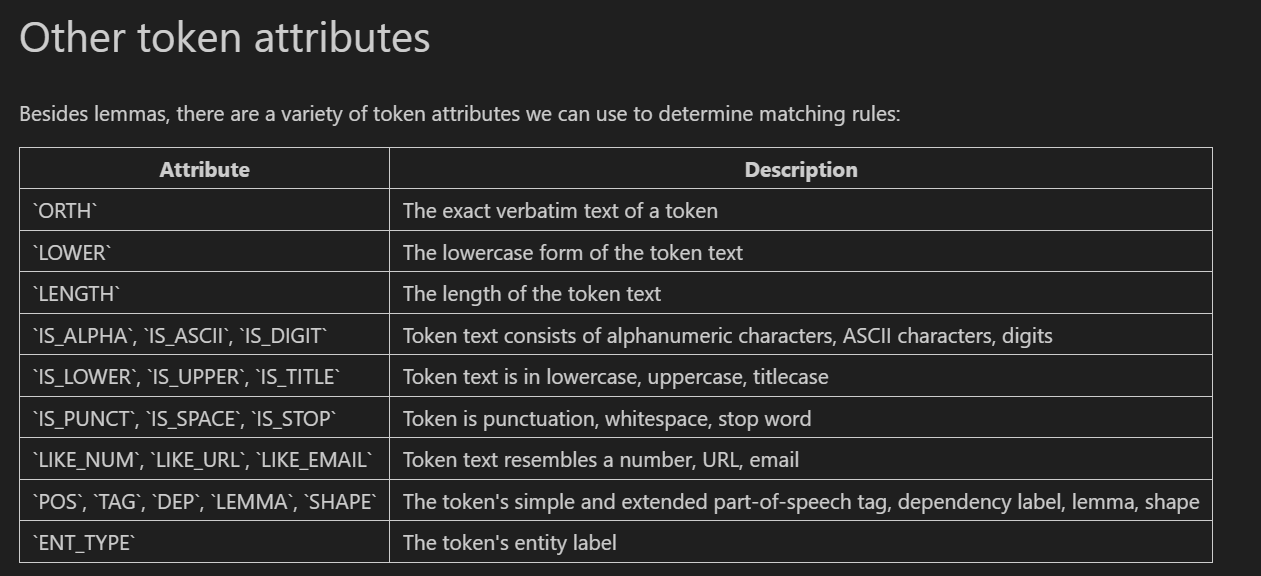

**📌 Token Wildcards in NLP (spaCy)**
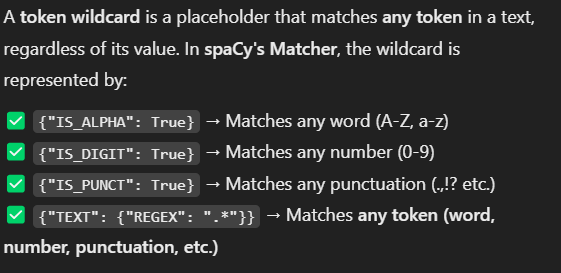




In [44]:
# 📌 Example 1: Match Any Word (Wildcard for Words)
# 💡 Find sentences that start with any word followed by "car"

import spacy
from spacy.matcher import Matcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Pattern: Any word + "car"
pattern = [
    {"IS_ALPHA": True},  # Any alphabetic word
    {"LOWER": "car"}     # Followed by "car"
]

matcher.add("WILDCARD_CAR_PATTERN", [pattern])

# Test sentences
texts = [
    "I love my car.",
    "Red car is fast.",
    "That new car looks amazing!"
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")


Matched: my car
Matched: Red car
Matched: new car


In [45]:
# ✅ "IS_ALPHA": True matches any word, allowing patterns like "my car", "Red car", or "new car".

In [48]:
# 📌 Example 2: Match Any Number (Wildcard for Digits)
# 💡 Find any number followed by "cars"

import spacy
from spacy.matcher import Matcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Pattern: Any word + "car"
pattern = [
    {"IS_DIGIT": True},  # Any number
    {"LOWER": "cars"}    # Followed by "cars"
]


matcher.add("WILDCARD_CAR_PATTERN", [pattern])

# Test sentences
texts = [
    "I love my car.",
    "i have 10 cars is fast.",
    "That 20 cars looks amazing!"
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")


Matched: 10 cars
Matched: 20 cars


In [51]:
# 📌 Example 3: Match Any Character (Wildcard for Everything)
# 💡 Find sentences containing any three words in a row

import spacy
from spacy.matcher import Matcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Pattern: Any word + "car"
pattern = [
    {"TEXT": {"REGEX": ".*"}},  # Any token
    {"TEXT": {"REGEX": ".*"}},  # Any token
    {"TEXT": {"REGEX": ".*"}}   # Any token
]


matcher.add("WILDCARD_CAR_PATTERN", [pattern])

# Test sentences
texts = [
    "I love my car.",
    "Red car is fast.",
    "That new car looks amazing!"
]

for text in texts:
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        print(f"Matched: {doc[start:end].text}")


Matched: I love my
Matched: love my car
Matched: my car.
Matched: Red car is
Matched: car is fast
Matched: is fast.
Matched: That new car
Matched: new car looks
Matched: car looks amazing
Matched: looks amazing!


**📌 PhraseMatcher in NLP (spaCy)**

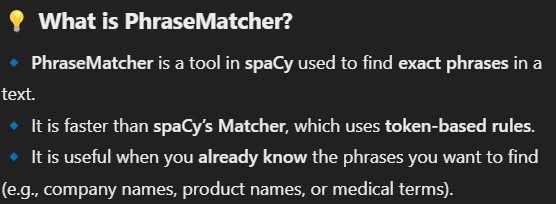

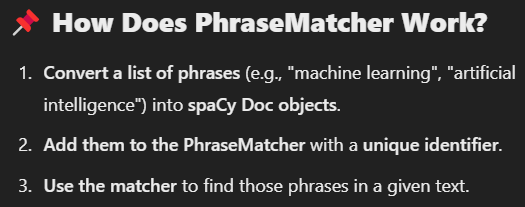

In [52]:
# 📌 Example 1: Basic Phrase Matching
# 💡 Find occurrences of "machine learning" and "deep learning" in a sentence.

import spacy
from spacy.matcher import PhraseMatcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# List of phrases to match
phrases = ["machine learning", "deep learning"]

# Convert phrases to spaCy Doc objects
patterns = [nlp(text) for text in phrases]

# Add patterns to matcher with a unique label
matcher.add("TECH_TERMS", patterns)

# Sample text
text = "I love machine learning and deep learning."

# Convert text to spaCy Doc
doc = nlp(text)

# Find matches
matches = matcher(doc)

# Display matches
for match_id, start, end in matches:
    print(f"Matched: {doc[start:end].text}")



Matched: machine learning
Matched: deep learning


In [ ]:
# ✅ Explanation:

# "machine learning" and "deep learning" are exactly matched in the text.
# PhraseMatcher is case-sensitive, so "Machine Learning" would not match "machine learning".


In [53]:
# 📌 Example 2: Case-Insensitive Phrase Matching
# 💡 Make phrase matching case-insensitive by converting the input text and phrases to lowercase.

import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")  # Make it case-insensitive

# Define phrases
phrases = ["Machine Learning", "Deep Learning"]

# Convert to spaCy Doc objects
patterns = [nlp(text) for text in phrases]

# Add to matcher
matcher.add("TECH_TERMS", patterns)

# Text with different casing
text = "I love MACHINE LEARNING and deep learning."

doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print(f"Matched: {doc[start:end].text}")



Matched: MACHINE LEARNING
Matched: deep learning


In [54]:
# ✅ Explanation:

# The attr="LOWER" argument ignores case differences.
# "MACHINE LEARNING" is matched even though the original phrase was "Machine Learning".

In [55]:
# 📌 Example 3: Finding Brand Names in a Sentence
# 💡 Detecting brand names like "Tesla", "Apple", "Samsung" in a review.

import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

# Brand names
brands = ["Tesla", "Apple", "Samsung"]

# Convert to spaCy Doc objects
patterns = [nlp(text) for text in brands]

# Add to matcher
matcher.add("BRAND_NAMES", patterns)

# Sample text
text = "I recently bought a Tesla and I love my new Apple iPhone."

doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print(f"Matched brand: {doc[start:end].text}")




Matched brand: Tesla
Matched brand: Apple


In [56]:
# ✅ Explanation:

# "Tesla" and "Apple" were matched in the text.
# "Samsung" was not matched because it was not in the text.

In [57]:
# 📌 Example 4: Matching Multi-Word Medical Terms
# 💡 Finding "heart attack" and "high blood pressure" in medical records.

import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

# Medical terms
medical_terms = ["heart attack", "high blood pressure"]

# Convert to spaCy Doc objects
patterns = [nlp(text) for text in medical_terms]

# Add to matcher
matcher.add("MEDICAL_CONDITIONS", patterns)

# Sample text
text = "The patient suffered a heart attack due to high blood pressure."

doc = nlp(text)
matches = matcher(doc)

for match_id, start, end in matches:
    print(f"Matched medical condition: {doc[start:end].text}")



Matched medical condition: heart attack
Matched medical condition: high blood pressure


In [58]:
# ✅ Explanation:

# "heart attack" and "high blood pressure" were found as exact matches in the medical text.

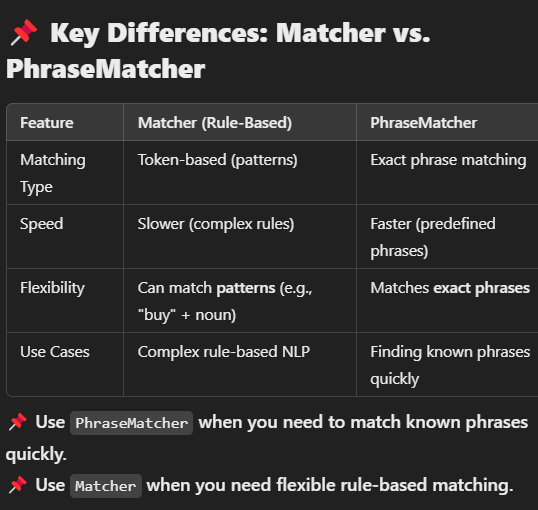

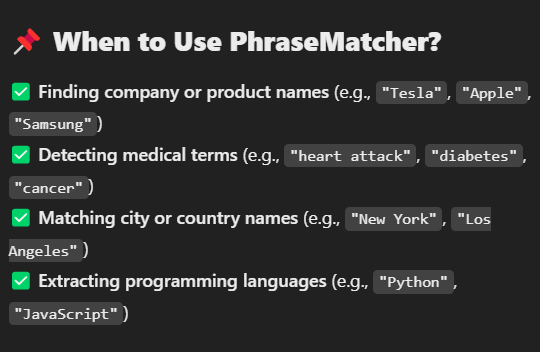

# NLP Basics Assessment

In [59]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [60]:
# 1. Create a Doc object from the file `owlcreek.txt`

with open('owlcreek.txt') as f:
  tell = nlp(f.read())

In [61]:
tell[:36]

AN OCCURRENCE AT OWL CREEK BRIDGE

by Ambrose Bierce

I

A man stood upon a railroad bridge in northern Alabama, looking down
into the swift water twenty feet below.  

In [62]:
# 2. How many tokens are contained in the file?

for token in tell:
    print(token.text, end=' | ')

AN | OCCURRENCE | AT | OWL | CREEK | BRIDGE | 

 | by | Ambrose | Bierce | 

 | I | 

 | A | man | stood | upon | a | railroad | bridge | in | northern | Alabama | , | looking | down | 
 | into | the | swift | water | twenty | feet | below | . |   | The | man | 's | hands | were | behind | 
 | his | back | , | the | wrists | bound | with | a | cord | . |   | A | rope | closely | encircled | his | 
 | neck | . |   | It | was | attached | to | a | stout | cross | - | timber | above | his | head | and | the | 
 | slack | fell | to | the | level | of | his | knees | . |   | Some | loose | boards | laid | upon | the | 
 | ties | supporting | the | rails | of | the | railway | supplied | a | footing | for | him | 
 | and | his | executioners | -- | two | private | soldiers | of | the | Federal | army | , | 
 | directed | by | a | sergeant | who | in | civil | life | may | have | been | a | deputy | 
 | sheriff | . |   | At | a | short | remove | upon | the | same | temporary | platform | was

In [63]:
len(tell)

4835

In [65]:
# 3. How many sentences are contained in the file?

sents = [sent for sent in tell.sents]
len(sents)

204

In [66]:
# 5. For each token in the sentence above, print its `text`, `POS` tag, `dep` tag and `lemma`

for token in sents[1]:
    print(f'{token.text:{15}} {token.pos_:{5}} {token.dep_:{10}} {token.lemma_:{15}}')

The             DET   det        the            
man             NOUN  poss       man            
's              PART  case       's             
hands           NOUN  nsubj      hand           
were            AUX   ROOT       be             
behind          ADP   prep       behind         

               SPACE dep        
              
his             PRON  poss       his            
back            NOUN  pobj       back           
,               PUNCT punct      ,              
the             DET   det        the            
wrists          NOUN  appos      wrist          
bound           VERB  acl        bind           
with            ADP   prep       with           
a               DET   det        a              
cord            NOUN  pobj       cord           
.               PUNCT punct      .              
                SPACE dep                       


In [67]:
# 6. Write a matcher called 'Swimming' that finds both occurrences of the phrase "swimming vigorously" in the text

# Import the Matcher library:

from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

pattern = [{'LOWER': 'swimming'}, {'IS_SPACE': True, 'OP':'*'}, {'LOWER': 'vigorously'}]

matcher.add('Swimming', [pattern])

found_matches = matcher(tell)
print(found_matches)

[(12881893835109366681, 1274, 1277), (12881893835109366681, 3609, 3612)]


In [70]:
# 7. Print the text surrounding each found match
print(tell[1265:1290])

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home


In [72]:
print(tell[3600:3615])

all this over his shoulder; he was now swimming
vigorously with the current
